In [54]:
import math

# odległość między dwoma punktami w ukladzie wspolrzednych
def odl_dwoch(p, q):
    return math.sqrt((p[0] - q[0])**2 + (p[1] - q[1]) ** 2)

# zlozonosc O(n^2)
def naiwny(punkty):    
    # wstępnie uznajemy że dwa pierwsze punkty są parą najbliższych
    najkrotsza = odl_dwoch(punkty[0], punkty[1])
    najblizsze = punkty[0], punkty[1]

    # aby uniknąć obliczeń jeśli są tylko dwa punkty
    if len(punkty) == 2: return najblizsze, najkrotsza
    
    # porownujemy kazy z kazdym, nadpisujemy zmienne jesli znajdziemy lepsza parę
    for i in range(len(punkty)-1):
        for j in range(i+1, len(punkty)):
            p, q = punkty[i], punkty[j]
            odl = odl_dwoch(p, q)
            if odl < najkrotsza:
                najkrotsza = odl
                najblizsze = p, q
    return najblizsze, najkrotsza

# uruchamia algorytm naiwny dla całego zbioru punktów
def alg_naiwny(punkty):
    odleglosc = naiwny(punkty)[1]
    return odleglosc

In [55]:
def pas_delta(punkty_po_y, srodek, delta, najblizsze):    
    # dobieramy punkty które są oddalone od srodka maksymalnie o deltę od srodka
    punkty = [x for x in punkty_po_y if delta > abs(srodek - x[0])] 
    ile_punktow = len(punkty)
    najkrotsze = delta

    # dla kazdego punktu jest maksymalnie 7 punktow blizszych niż delta (dowod przez pakowanie)
    for i in range(ile_punktow - 1):
        # dla kazdego punktu sprawdzamy maks 7 punktów wyżej od niego
        for j in range(i+1, min(i+7, ile_punktow)):
            p, q = punkty[i], punkty[j]
            odl = odl_dwoch(p,q)
            if odl < najkrotsze:
                najblizsze = p, q
                najkrotsze = odl
    return najblizsze, najkrotsze

In [56]:
# zlozonosc O(n(log n)^2)
def para_najblizszych_wolne(punkty):
    # jesli punktów jest 3 lub mniej, algorytm naiwny będzie rownie skuteczny
    if len(punkty) <= 3: return naiwny(punkty)

    # punkty posortowane po x, zebyśmy mogli podzielic je prostą x
    punkty_po_x = sorted(punkty, key=lambda x: x[0])    
    pol = len(punkty) // 2
    srodek = (punkty_po_x[-1][0] - punkty_po_x[0][0]) / 2
    L = punkty_po_x[:pol]
    R = punkty_po_x[pol:]

    # szukamy pary najbliższych dla obu połówek
    najblizsze_L, najkrotsze_L = para_najblizszych_wolne(L)
    najblizsze_R, najkrotsze_R = para_najblizszych_wolne(R)
    if (najkrotsze_L <= najkrotsze_R): najkrotsze, najblizsze = najkrotsze_L, najblizsze_L
    else: najkrotsze, najblizsze = najkrotsze_R, najblizsze_R

    # punkty posortowane po y, żebyśmy mogli przeszukać pary punktów lezacych w przeciwnych polowkach
    punkty_po_y = sorted(punkty, key=lambda x: (x[1],x[0]))
    najblizsze_S, najkrotsze_S = pas_delta(punkty_po_y, srodek, najkrotsze, najblizsze)
    
    # zwracamy wynik
    if najkrotsze <= najkrotsze_S: return najblizsze, najkrotsze
    else: return najblizsze_S, najkrotsze_S

def dziel_i_rzadz_wolne(punkty):
    odleglosc = para_najblizszych_wolne(punkty)[1]
    return odleglosc

In [57]:
# zlozonosc O(n log n)
def para_najblizszych_szybkie(punkty_po_x, punkty_po_y):
    # jesli punktów jest 3 lub mniej, algorytm naiwny będzie rownie skuteczny
    if len(punkty_po_x) <= 3: return naiwny(punkty_po_x)

    # punkty są posortowane po x, zebyśmy mogli podzielic je prostą x
    pol = len(punkty_po_x) // 2
    srodek = (punkty_po_x[-1][0] - punkty_po_x[0][0]) / 2
    L_po_x = punkty_po_x[:pol]
    R_po_x = punkty_po_x[pol:]
    L_po_y, R_po_y = list(), list()
    for p in punkty_po_y:
        if p[0] < srodek: L_po_y.append(p)
        else: R_po_y.append(p)

    # szukamy pary najbliższych dla obu połówek
    najblizsze_L, najkrotsze_L = para_najblizszych_szybkie(L_po_x, L_po_y)
    najblizsze_R, najkrotsze_R = para_najblizszych_szybkie(R_po_x, R_po_y)
    if (najkrotsze_L <= najkrotsze_R): najkrotsze, najblizsze = najkrotsze_L, najblizsze_L
    else: najkrotsze, najblizsze = najkrotsze_R, najblizsze_R

    # punkty posortowane po y, żebyśmy mogli przeszukać pary punktów lezacych w przeciwnych polowkach
    najblizsze_S, najkrotsze_S = pas_delta(punkty_po_y, srodek, najkrotsze, najblizsze)
    
    # zwracamy wynik
    if najkrotsze <= najkrotsze_S: return najblizsze, najkrotsze
    else: return najblizsze_S, najkrotsze_S

def dziel_i_rzadz_szybkie(punkty):
    punkty_po_x = sorted(punkty, key=lambda x: x[0])    
    punkty_po_y = sorted(punkty, key=lambda x: (x[1],x[0]))
    odleglosc = para_najblizszych_szybkie(punkty_po_x, punkty_po_y)[1]
    return odleglosc

In [58]:
from matplotlib import pyplot as plt

def rysunek(punkty):
    x, y = [x[0] for x in punkty], [x[1] for x in punkty]
    fig = plt.figure(figsize=(8,8))
    plt.gca().set_aspect('equal',adjustable='datalim')
    plt.scatter(x,y)

In [59]:
def pionowe(n: int):
    return list(set((1, i) for i in range(n)))
def poziome(n: int):
    return list(set((i, 1) for i in range(n)))
def ukosne(n: int):
    return list(set((i, i) for i in range(n)))
def kwadrat(n: int):
    return list(set((i, j) for i in range(n) for j in range(n)))

algorytm naiwny:	2.327425718307495 s
algorytm O(n(log n)^2):	0.015625953674316406 s
algorytm O(n log n):	0.015624046325683594 s
najmniejsza odleglosc:	0.3535533905932738


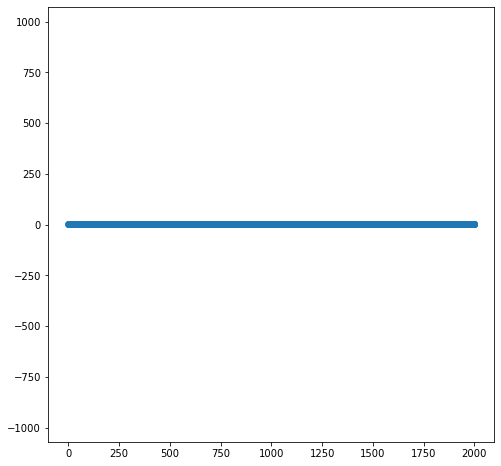

In [98]:
import time
punkty = poziome(2000)
# dodajemy jeden punkt wylamujacy sie z reguly - aby sprawdzic poprawnosc
punkty.append((1.75, 1.25))

start = time.time()
distance_0 = alg_naiwny(punkty)
print("algorytm naiwny:\t%s s" % (time.time() - start))

start = time.time()
distance_1 = dziel_i_rzadz_wolne(punkty)
print("algorytm O(n(log n)^2):\t%s s" % (time.time() - start))

start = time.time()
distance_2 = dziel_i_rzadz_szybkie(punkty)
print("algorytm O(n log n):\t%s s" % (time.time() - start))

print("najmniejsza odleglosc:\t%s" % distance_2)

rysunek(punkty)
plt.show()

algorytm naiwny:	2.3271310329437256 s
algorytm O(n(log n)^2):	0.14062094688415527 s
algorytm O(n log n):	0.15624523162841797 s
najmniejsza odleglosc:	0.7905694150420949


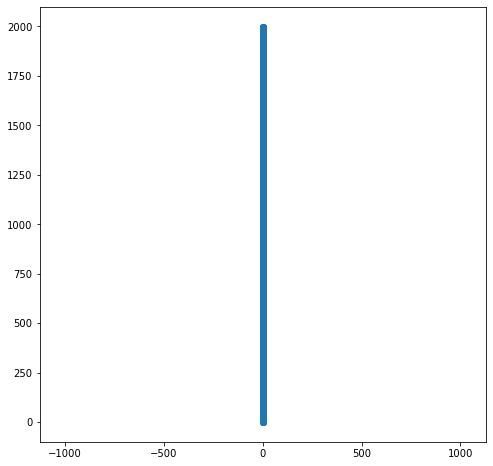

In [95]:
punkty = pionowe(2000)
# dodajemy jeden punkt wylamujacy sie z reguly - aby sprawdzic poprawnosc
punkty.append((1.75, 1.25))

start = time.time()
distance_0 = alg_naiwny(punkty)
print("algorytm naiwny:\t%s s" % (time.time() - start))

start = time.time()
distance_1 = dziel_i_rzadz_wolne(punkty)
print("algorytm O(n(log n)^2):\t%s s" % (time.time() - start))

start = time.time()
distance_2 = dziel_i_rzadz_szybkie(punkty)
print("algorytm O(n log n):\t%s s" % (time.time() - start))

print("najmniejsza odleglosc:\t%s" % distance_2)

rysunek(punkty)
plt.show()

algorytm naiwny:	2.5109951496124268 s
algorytm O(n(log n)^2):	0.015625953674316406 s
algorytm O(n log n):	0.015624761581420898 s
najmniejsza odleglosc:	0.7905694150420949


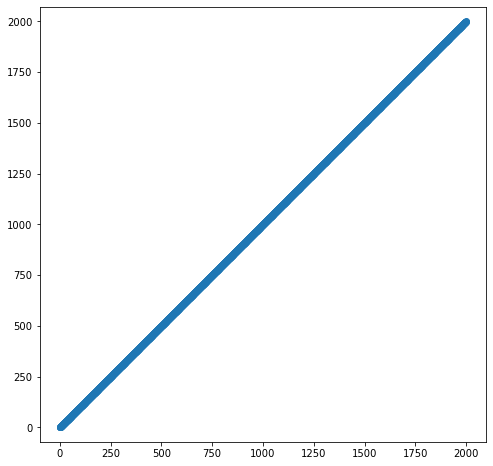

In [89]:
punkty = ukosne(2000)
# dodajemy jeden punkt wylamujacy sie z reguly - aby sprawdzic poprawnosc
punkty.append((1.75, 1.25))

start = time.time()
distance_0 = alg_naiwny(punkty)
print("algorytm naiwny:\t%s s" % (time.time() - start))

start = time.time()
distance_1 = dziel_i_rzadz_wolne(punkty)
print("algorytm O(n(log n)^2):\t%s s" % (time.time() - start))

start = time.time()
distance_2 = dziel_i_rzadz_szybkie(punkty)
print("algorytm O(n log n):\t%s s" % (time.time() - start))

print("najmniejsza odleglosc:\t%s" % distance_2)

rysunek(punkty)
plt.show()

algorytm naiwny:	3.960329055786133 s
algorytm O(n(log n)^2):	0.047998905181884766 s
algorytm O(n log n):	0.02399897575378418 s
najmniejsza odleglosc:	0.3535533905932738


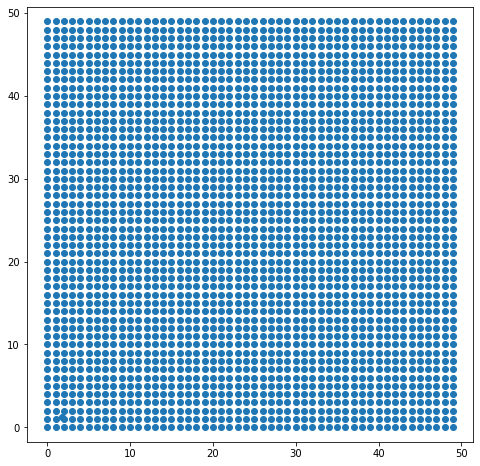

In [63]:
punkty = kwadrat(50)
# dodajemy jeden punkt wylamujacy sie z reguly - aby sprawdzic poprawnosc
punkty.append((1.75, 1.25))

start = time.time()
distance_0 = alg_naiwny(punkty)
print("algorytm naiwny:\t%s s" % (time.time() - start))

start = time.time()
distance_1 = dziel_i_rzadz_wolne(punkty)
print("algorytm O(n(log n)^2):\t%s s" % (time.time() - start))

start = time.time()
distance_2 = dziel_i_rzadz_szybkie(punkty)
print("algorytm O(n log n):\t%s s" % (time.time() - start))

print("najmniejsza odleglosc:\t%s" % distance_2)

rysunek(punkty)
plt.show()